# 3.1 Autor


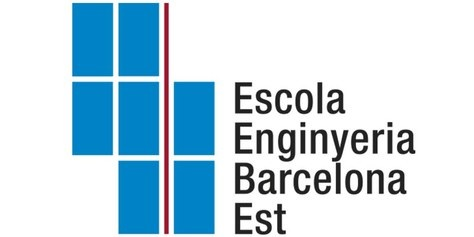

Introducció a la llibreria Altair.
**Pere Ponsa**
Sistemes d'Informació i Comunicació Industrial (SICI)

La llibreria de visualització Altair parteix de PANDAS. 
L'objecte principal d'aquesta llibreria és l'objecte CHART. 
Aquest objecte és útil per a visualització de dades en les que
s'està utilitzant estatística bàsica.
Referència: [link text](https://altair-viz.github.io/getting_started/starting.html)

# 3.2 Importar llibreries

In [1]:
import pandas as pd
import altair as alt

Les dades que s'estan utilitzant en aquest quadern provenen de vega_datasets, aquest és un conjunt de dades en github.
Per exemple, si es vol tenir les dades anomenades cars cal fer la següent crida:
from vega_datasets import data
cars = data.cars.url
NOTA: Vega té una funcionalitat desenvolupada amb la programació en JSON. Això escapa
als continguts de l'assignatura i per tant ens quedem amb Altair i no amb Vega, ja que utilitza
Python.

# 3.3 Funcionalitats gràfiques

Els desenvolupadors d'Altair disposen d'una galeria en la que podem practicar amb el codi i veure la visualització. Aquí un petit exemple.

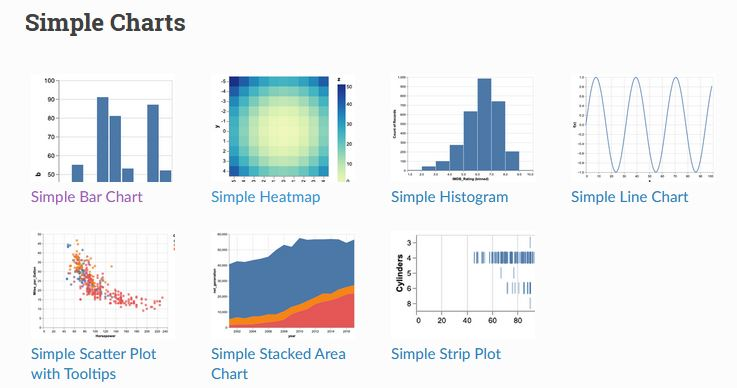

Referència a la Galeria de Altair: [link text](https://altair-viz.github.io/gallery/index.html)

COMENTARI: si entenem com es configura una visualització, podrem ser capaços de generar els gràfics, i no dependre de solucions comercials tancades que limiten la nostra capacitat d'aprenentatge i escalabilitat.

Seguim: Així per exemple, per al dataframe de cars, es pot generar un Scatter Plot interactiu amb les següents instruccions.

In [2]:
from vega_datasets import data

source = data.cars()

data.cars()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [3]:
alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

alt.Chart(...)

Aquesta gràfica radial (Radial Chart utilitza la representació circular tenint en compte de dibuixar més àrea al valor numèric més alt

In [4]:
source = pd.DataFrame({"values": [12, 23, 47, 6, 52, 19]})

base = alt.Chart(source).encode(
    theta=alt.Theta("values:Q", stack=True),
    radius=alt.Radius("values", scale=alt.Scale(type="sqrt", zero=True, rangeMin=20)),
    color="values:N",
)

c1 = base.mark_arc(innerRadius=20, stroke="#fff")

c2 = base.mark_text(radiusOffset=10).encode(text="values:Q")

c1 + c2

alt.LayerChart(...)

I a continuació un exemple de la climatologia de Seattle.

In [5]:
source = data.seattle_weather()

data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', title='Date'),
    alt.Y('temp_max:Q',
        title='Maximum Daily Temperature (C)',
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

alt.vconcat(
    points,
    bars,
    data=source,
    title="Seattle Weather: 2012-2015"
)

alt.VConcatChart(...)

Aquest gràfic sobre la climatologia de Seattle és interactiu ja que al moure el ratolí i seleccionar un fragment de la gràfica, s'observa la variació en el diagrama de barres inferior

# 3.4 Exercici Quadern

L'objectiu d'aquest exercici és la de crear un quadern amb Colab, que expliqui, de forma semblant a aquest quadern per a la llibreria Altair, algunes funcionalitats gràfiques de la llibreria MATPLOTLIB. 
Segurament la interactivitat està més limitada dins MATPLOTLIB, però és una llibreria bàsica imprescindible en Python. 
No cal explorar totes les funcions de MATPLOTLIB. El grup ha de pensar QUINES DADES i QUINA REPRESENTACIÓ GRÂFICA s'han de fer servir en aquest exercici.
Per a més detall es pot consultar el lloc web [link text](https://matplotlib.org/stable/gallery/index.html)

# 3.5 Referències

L'autor és Jeffrey Heer, professor de la Universitat de Washington.

Les dades per a fer les visualitzacions estan dins un repositori en github. L'usuari prefereix posar allí tots els fitxers que serveixen de codi font per a
les visualitzacoins. Així per exemple el fitxer seattle-weather.csv es troba en aquest repositori.
[link text](https://github.com/vega/vega-datasets/tree/next/data)